In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Desktop/Erdos Data Science/Fraud_Payments/data/fraud_payment_data', sep=',', header=0) 

In [ ]:
df["International"]=(df["Sender_Country"]==df["Bene_Country"]).astype(int)
df["Sender_Bene_Pair"]=df.apply(lambda row: [row['Sender_Id'], row['Bene_Id']], axis=1)
df

In [4]:
df.info()
print('There are ' +str(len(df['Sender_Id'].unique()))+ ' unique accounts.')
print('There are ' +str(len(df['Sender_Sector'].unique()))+ ' unique accounts.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498177 non-null  object 
 1   Transaction_Id    1498177 non-null  object 
 2   Sender_Id         1279291 non-null  object 
 3   Sender_Account    1279291 non-null  object 
 4   Sender_Country    1279291 non-null  object 
 5   Sender_Sector     1279291 non-null  float64
 6   Sender_lob        1279291 non-null  object 
 7   Bene_Id           1282284 non-null  object 
 8   Bene_Account      1282284 non-null  object 
 9   Bene_Country      1282284 non-null  object 
 10  USD_amount        1498177 non-null  float64
 11  Label             1498177 non-null  int64  
 12  Transaction_Type  1498177 non-null  object 
 13  International     1498177 non-null  int64  
 14  Sender_Bene_Pair  1498177 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage:

In [5]:
(df.Label==1).sum()
Fraud_Trans=df[df.Label==1]
Fraud_Trans
Fraud_Trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30819 entries, 11 to 1498072
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time_step         30819 non-null  object 
 1   Transaction_Id    30819 non-null  object 
 2   Sender_Id         26698 non-null  object 
 3   Sender_Account    26698 non-null  object 
 4   Sender_Country    26698 non-null  object 
 5   Sender_Sector     26698 non-null  float64
 6   Sender_lob        26698 non-null  object 
 7   Bene_Id           25683 non-null  object 
 8   Bene_Account      25683 non-null  object 
 9   Bene_Country      25683 non-null  object 
 10  USD_amount        30819 non-null  float64
 11  Label             30819 non-null  int64  
 12  Transaction_Type  30819 non-null  object 
 13  International     30819 non-null  int64  
 14  Sender_Bene_Pair  30819 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 3.8+ MB


In [6]:
print('There are ' +str(len(Fraud_Trans['Sender_Id'].unique()))+ ' unique fraudulent accounts.')
print('There are ' +str(len(Fraud_Trans['Sender_Sector'].unique()))+ ' unique fraudulent accounts.')

There are 7981 unique fraudulent accounts.
There are 20759 unique fraudulent accounts.


<Axes: ylabel='Frequency'>

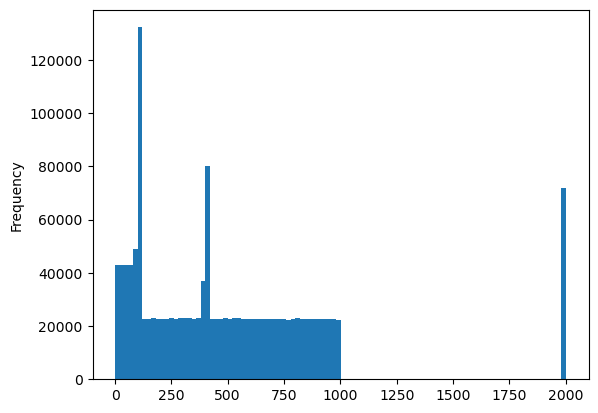

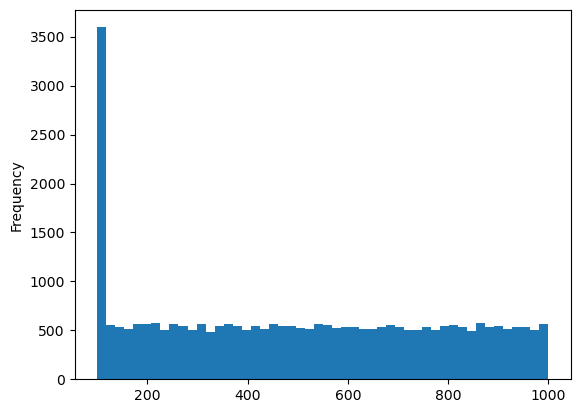

In [7]:
plt.figure()
df[df.USD_amount<2500].USD_amount.plot.hist(bins=100)
plt.figure()
Fraud_Trans[Fraud_Trans.USD_amount<2500].USD_amount.plot.hist(bins=50)

<Axes: xlabel='Transaction_Type'>

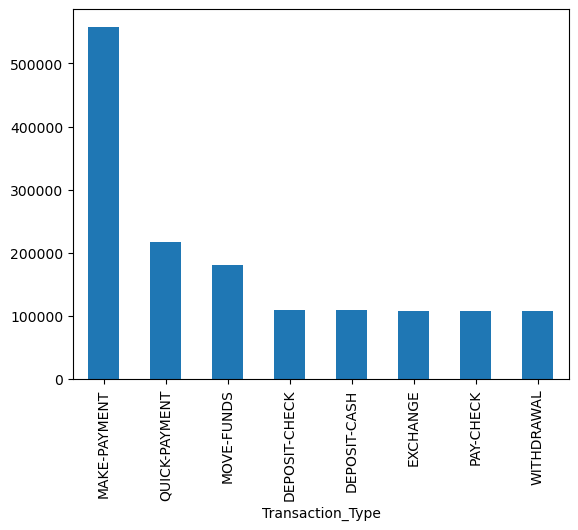

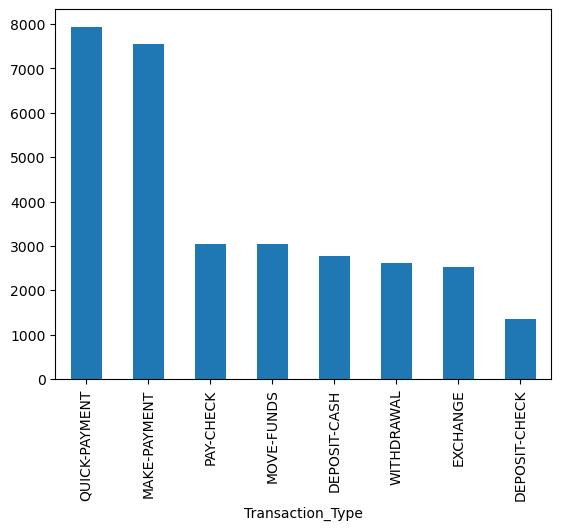

In [8]:
plt.figure()
df.Transaction_Type.value_counts().plot.bar()
plt.figure()
Fraud_Trans.Transaction_Type.value_counts().plot.bar()

In [9]:
print(len(Fraud_Trans.Sender_Country.unique()))

print((df.Sender_Country.value_counts()))
print((Fraud_Trans.Sender_Country.value_counts()))


253
Sender_Country
USA                       997236
GERMANY                    73431
CANADA                     27383
LIECHTENSTEIN               1163
THAILAND                    1157
                           ...  
BARBADOS                     421
TONGA                        419
GREECE                       403
UNITED-STATES                397
BOSNIA-AND-HERZEGOVINA       391
Name: count, Length: 252, dtype: int64
Sender_Country
USA           21242
CANADA          949
GERMANY          49
GUAM             41
MOZAMBIQUE       41
              ...  
ARUBA             7
MALAYSIA          7
SWAZILAND         7
HONDURAS          5
VANUATU           4
Name: count, Length: 252, dtype: int64


<Axes: xlabel='International'>

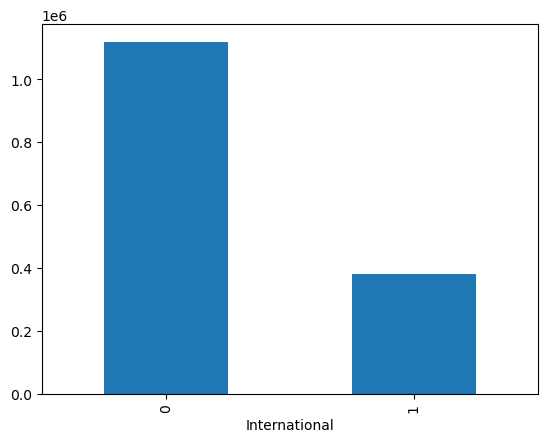

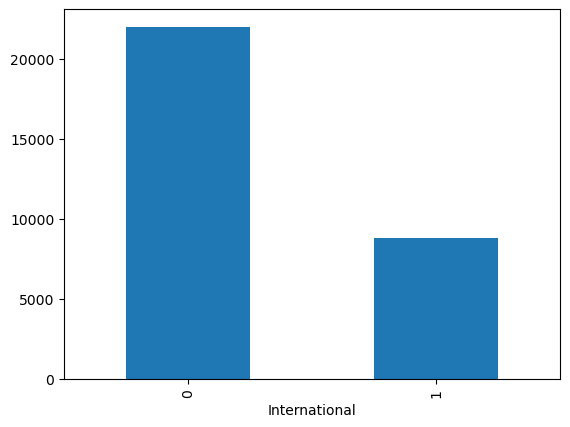

In [10]:
plt.figure()
df.International.value_counts().plot.bar()
plt.figure()
Fraud_Trans.International.value_counts().plot.bar()

In [11]:
Fraud_Trans.Bene_Id.value_counts()

Bene_Id
JPMC-CLIENT-1700574     17
JPMC-CLIENT-653524      15
JPMC-CLIENT-1907524     15
JPMC-CLIENT-1625282     14
JPMC-CLIENT-1847866     13
                        ..
CLIENT-407504            1
BILL-COMPANY-400445      1
BILL-COMPANY-1163016     1
CLIENT-1163133           1
CLIENT-8965              1
Name: count, Length: 14184, dtype: int64

In [12]:
Fraud_Trans.Sender_Id.value_counts()

Sender_Id
JPMC-CLIENT-1956734     35
JPMC-CLIENT-803446      34
JPMC-CLIENT-1897489     28
JPMC-CLIENT-1381947     27
JPMC-CLIENT-2170292     27
                        ..
BILL-COMPANY-990897      1
BILL-COMPANY-992281      1
CLIENT-984597            1
JPMC-CLIENT-993081       1
BILL-COMPANY-1096291     1
Name: count, Length: 7980, dtype: int64

In [ ]:
df.Sender_Bene_Pair.value_counts()
Fraud_Trans.Sender_Bene_Pair.value_counts()

In [ ]:
df[df.Transaction_Type=="EXCHANGE"]